In [1]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

In [2]:
# Generate a DataFrame with random values
np. random .seed(0)
df = pd. DataFrame ({
'A': np. random . randn (100),
'B': np. random . randint (1, 100 , 100),
'C': [np.nan if np. random .rand () < 0.2 else x for x in np.
random .randn (100)]
})
df

,A,B,C
0,1.764052,33,-0.912822
1,0.400157,71,1.117016
2,0.978738,86,-1.315907
3,2.240893,32,-0.461585
4,1.867558,14,NaN
...,...,...,...
95,0.706573,26,-0.397272
96,0.010500,68,-0.132881
97,1.785870,36,NaN
98,0.126912,31,-0.309013


In [3]:
# Check for missing values
df. isnull ().sum ()

,0
A,0
B,0
C,22


In [4]:
# Fill missing values with mean
df['C']. fillna (df['C'].mean () , inplace =True)
df

<ipython-input-4-fe679836f8e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['C']. fillna (df['C'].mean () , inplace =True)


,A,B,C
0,1.764052,33,-0.912822
1,0.400157,71,1.117016
2,0.978738,86,-1.315907
3,2.240893,32,-0.461585
4,1.867558,14,-0.152169
...,...,...,...
95,0.706573,26,-0.397272
96,0.010500,68,-0.132881
97,1.785870,36,-0.152169
98,0.126912,31,-0.309013


In [5]:
# Add noise
noise = np. random . normal (0, 0.1, df.shape[0])
df['A'] = df['A'] + noise

In [6]:
# Binning
labels = ['Low ', 'Medium ', 'High ']
df['A_bins '] = pd.cut(df['A'], bins=3, labels = labels )
df

,A,B,C,A_bins
0,1.693582,33,-0.912822,High
1,0.494483,71,1.117016,Medium
2,1.053457,86,-1.315907,High
3,2.121999,32,-0.461585,High
4,1.944883,14,-0.152169,High
...,...,...,...,...
95,0.718945,26,-0.397272,Medium
96,-0.002511,68,-0.132881,Medium
97,1.795266,36,-0.152169,High
98,0.221217,31,-0.309013,Medium


In [16]:
df['A_bins'] = pd.cut(df['A'], bins=5)  # Adjust bins as needed


In [17]:
df['A_binned_mean']=df.groupby('A_bins')['A'].transform ('mean')
df

<ipython-input-17-0bf02784ac84>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['A_binned_mean']=df.groupby('A_bins')['A'].transform ('mean')


,A,B,C,A_bins,A_bins,A_binned_mean
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350
...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907


In [18]:
from scipy. ndimage . filters import gaussian_filter
sigma = 2 # Standard deviation for Gaussian kernel
df['A_gaussian_smoothed '] = gaussian_filter (df['A'], sigma)
df

<ipython-input-18-a0be89328d25>:1: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy. ndimage . filters import gaussian_filter


,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350,1.232483
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118,1.228865
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350,1.082050
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350,0.864665
...,...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118,0.588276
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907,0.591550
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350,0.572540
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907,0.523229


In [19]:
# Sampling
df_sample = df. sample (frac=0.2)
df_sample

,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982
51,0.474920,36,0.823504,Medium,"(0.446, 1.426]",0.926118,-0.466367
28,1.348472,62,-1.034243,High,"(0.446, 1.426]",0.926118,0.436787
65,-0.563428,28,0.317218,Medium,"(-1.515, -0.535]",-0.941707,-0.648589
49,-0.369803,30,-0.152169,Medium,"(-0.535, 0.446]",-0.023907,-0.520457
42,-1.678226,90,-0.739563,Low,"(-2.5, -1.515]",-1.770926,-0.539969
84,1.457341,81,-0.152169,High,"(1.426, 2.406]",1.821350,0.561605
55,0.326081,42,-0.239379,Medium,"(-0.535, 0.446]",-0.023907,-0.196446
45,-0.463020,52,0.267051,Medium,"(-0.535, 0.446]",-0.023907,-0.340905
77,-0.543301,6,0.481481,Medium,"(-1.515, -0.535]",-0.941707,-0.453505


In [22]:
# Min -Max normalization - manually
df['A_norm_man '] = (df['A'] - df['A'].min ()) / (df['A'].max () -df['A'].min ())
df

,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed,A_norm_man
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350,1.232483,0.854606
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118,1.228865,0.609959
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982,0.724004
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350,1.082050,0.942014
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350,0.864665,0.905878
...,...,...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118,0.588276,0.655755
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907,0.591550,0.508560
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350,0.572540,0.875352
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907,0.523229,0.554206


In [23]:
# Min -Max normalization using sklearn
from sklearn . preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
# Fit and transform the data
df['A_norm_sk '] = scaler . fit_transform (df['A']. values . reshape (-1
, 1))
df

,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed,A_norm_man,A_norm_sk
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350,1.232483,0.854606,0.854606
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118,1.228865,0.609959,0.609959
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982,0.724004,0.724004
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350,1.082050,0.942014,0.942014
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350,0.864665,0.905878,0.905878
...,...,...,...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118,0.588276,0.655755,0.655755
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907,0.591550,0.508560,0.508560
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350,0.572540,0.875352,0.875352
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907,0.523229,0.554206,0.554206


In [24]:
# Z- Score normalization - Manually
df['B_zscore_man '] = (df['B'] - df['B'].mean ()) / df['B'].std ()
df

,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed,A_norm_man,A_norm_sk,B_zscore_man
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350,1.232483,0.854606,0.854606,-0.519591
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118,1.228865,0.609959,0.609959,0.874792
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982,0.724004,0.724004,1.425207
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350,1.082050,0.942014,0.942014,-0.556286
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350,0.864665,0.905878,0.905878,-1.216783
...,...,...,...,...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118,0.588276,0.655755,0.655755,-0.776452
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907,0.591550,0.508560,0.508560,0.764710
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350,0.572540,0.875352,0.875352,-0.409509
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907,0.523229,0.554206,0.554206,-0.592980


In [25]:
# Z- Score normalization using sklearn
from sklearn . preprocessing import StandardScaler
# Create a scaler object and fit - transform the data
scaler = StandardScaler ()
df['B_zscore_sk '] = scaler . fit_transform (df['B']. values . reshape (
-1,1))
df

,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed,A_norm_man,A_norm_sk,B_zscore_man,B_zscore_sk
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350,1.232483,0.854606,0.854606,-0.519591,-0.522209
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118,1.228865,0.609959,0.609959,0.874792,0.879200
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982,0.724004,0.724004,1.425207,1.432387
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350,1.082050,0.942014,0.942014,-0.556286,-0.559088
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350,0.864665,0.905878,0.905878,-1.216783,-1.222913
...,...,...,...,...,...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118,0.588276,0.655755,0.655755,-0.776452,-0.780363
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907,0.591550,0.508560,0.508560,0.764710,0.768562
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350,0.572540,0.875352,0.875352,-0.409509,-0.411572
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907,0.523229,0.554206,0.554206,-0.592980,-0.595967


In [26]:
# Data aggregation
df['Aggregated '] = (df['A'] + df['B']) / 2
df

,A,B,C,A_bins,A_bins,A_binned_mean,A_gaussian_smoothed,A_norm_man,A_norm_sk,B_zscore_man,B_zscore_sk,Aggregated
0,1.693582,33,-0.912822,High,"(1.426, 2.406]",1.821350,1.232483,0.854606,0.854606,-0.519591,-0.522209,17.346791
1,0.494483,71,1.117016,Medium,"(0.446, 1.426]",0.926118,1.228865,0.609959,0.609959,0.874792,0.879200,35.747242
2,1.053457,86,-1.315907,High,"(0.446, 1.426]",0.926118,1.194982,0.724004,0.724004,1.425207,1.432387,43.526728
3,2.121999,32,-0.461585,High,"(1.426, 2.406]",1.821350,1.082050,0.942014,0.942014,-0.556286,-0.559088,17.060999
4,1.944883,14,-0.152169,High,"(1.426, 2.406]",1.821350,0.864665,0.905878,0.905878,-1.216783,-1.222913,7.972442
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.718945,26,-0.397272,Medium,"(0.446, 1.426]",0.926118,0.588276,0.655755,0.655755,-0.776452,-0.780363,13.359473
96,-0.002511,68,-0.132881,Medium,"(-0.535, 0.446]",-0.023907,0.591550,0.508560,0.508560,0.764710,0.768562,33.998745
97,1.795266,36,-0.152169,High,"(1.426, 2.406]",1.821350,0.572540,0.875352,0.875352,-0.409509,-0.411572,18.897633
98,0.221217,31,-0.309013,Medium,"(-0.535, 0.446]",-0.023907,0.523229,0.554206,0.554206,-0.592980,-0.595967,15.610608


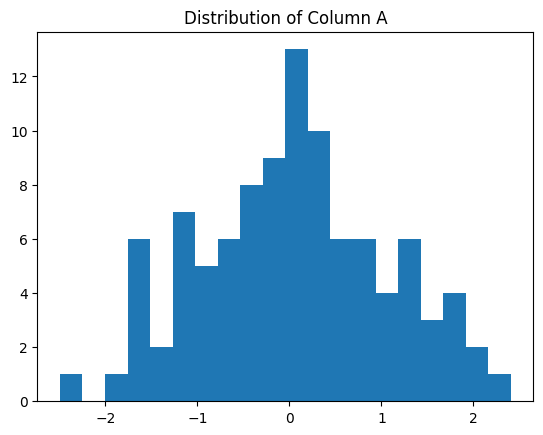

In [27]:
# Plotting
plt.hist(df['A'], bins=20)
plt.title('Distribution of Column A')
plt.show ()


In [28]:
 #Correlation matrix
correlation_matrix = df[['A', 'B', 'C']].corr ()
correlation_matrix


,A,B,C
A,1.000000,-0.043590,-0.072884
B,-0.043590,1.000000,-0.022333
C,-0.072884,-0.022333,1.000000


In [34]:
X = [7, 5, 6, 3, 2, 5, 4, 1]

# Haar wavelet transform function
def updated_haar_wavelet_transform(signal):
    n = len(signal)
    if n == 1:
        return signal
    avg = [(signal[2 * i] + signal[2 * i + 1]) for i in range(n // 2)]
    diff = [(signal[2 * i + 1] - signal[2 * i]) for i in range(n // 2)]
    return avg + diff

# Apply the updated Haar wavelet transform
X_prime = updated_haar_wavelet_transform(X)

# Truncate the coefficients (set values smaller than 0 to 0)
X_prime_truncated = [x if x >= 0 else 0 for x in X_prime]

# Print the results
print("Original signal (X):", X)
print("Wavelet Coefficients (X'):", X_prime)
print("Truncated Coefficients (Truncated X'):", X_prime_truncated)


Original signal (X): [7, 5, 6, 3, 2, 5, 4, 1]
Wavelet Coefficients (X'): [12, 9, 7, 5, -2, -3, 3, -3]
Truncated Coefficients (Truncated X'): [12, 9, 7, 5, 0, 0, 3, 0]
